In [60]:
import pandas as pd
import numpy as np
import time
import datetime

In [ ]:
pip install matplotlib

In [ ]:
pip install plotly

In [63]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ipywidgets import widgets
import plotly.express as px
import time

In [64]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [65]:
corp_credit_rating = pd.read_csv('corporateCreditRatingWithFinancialRatios.csv')

In [66]:
corp_credit_rating.shape

(7805, 25)

In [67]:
corp_credit_rating.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [68]:
# Create a year column 
corp_credit_rating['Date'] = pd.DatetimeIndex(corp_credit_rating["Rating Date"]).year
corp_credit_rating.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Date
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333,2010
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132,2010
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231,2010
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999,2010
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174,2010


In [69]:
# columns in dataset
list(corp_credit_rating.columns)

['Rating Agency',
 'Corporation',
 'Rating',
 'Rating Date',
 'CIK',
 'Binary Rating',
 'SIC Code',
 'Sector',
 'Ticker',
 'Current Ratio',
 'Long-term Debt / Capital',
 'Debt/Equity Ratio',
 'Gross Margin',
 'Operating Margin',
 'EBIT Margin',
 'EBITDA Margin',
 'Pre-Tax Profit Margin',
 'Net Profit Margin',
 'Asset Turnover',
 'ROE - Return On Equity',
 'Return On Tangible Equity',
 'ROA - Return On Assets',
 'ROI - Return On Investment',
 'Operating Cash Flow Per Share',
 'Free Cash Flow Per Share',
 'Date']

In [70]:
# Number of years
corp_credit_rating.Date.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [71]:
# Rating agencies in dataset
corp_credit_rating["Rating Agency"].unique()

array(["Standard & Poor's Ratings Services", 'DBRS',
       "Moody's Investors Service", 'Fitch Ratings',
       'Japan Credit Rating Agency,Ltd.',
       'HR Ratings de Mexico S.A. de C.V.', 'Egan-Jones Ratings Company'],
      dtype=object)

In [72]:
# Companies in dataset
corp_credit_rating.Corporation.unique()

array(['American States Water Co.', 'Automatic Data Processing Inc.',
       'Avnet Inc.', ..., 'Xerox Corp.', 'YPF Sociedad Anonima',
       'iHeartCommunications Inc.'], dtype=object)

In [73]:
# Sector in dataset
corp_credit_rating.Sector.unique()

array(['Utils', 'BusEq', 'Shops', 'Manuf', 'NoDur', 'Other', 'Chems',
       'Telcm', 'Hlth', 'Money', 'Durbl', 'Enrgy'], dtype=object)

In [74]:
# Types of bonds in dataset
corp_credit_rating.Rating.unique()

array(['A-', 'AAA', 'BBB-', 'AA-', 'A', 'BBB+', 'BBB', 'BB', 'B', 'BB+',
       'B+', 'BB-', 'B-', 'A+', 'CCC', 'AA', 'CCC+', 'CC', 'C', 'CCC-',
       'AA+', 'D', 'CC+'], dtype=object)

In [75]:
# Check for missing values
corp_credit_rating[pd.isnull(corp_credit_rating)].count()

Rating Agency                    0
Corporation                      0
Rating                           0
Rating Date                      0
CIK                              0
Binary Rating                    0
SIC Code                         0
Sector                           0
Ticker                           0
Current Ratio                    0
Long-term Debt / Capital         0
Debt/Equity Ratio                0
Gross Margin                     0
Operating Margin                 0
EBIT Margin                      0
EBITDA Margin                    0
Pre-Tax Profit Margin            0
Net Profit Margin                0
Asset Turnover                   0
ROE - Return On Equity           0
Return On Tangible Equity        0
ROA - Return On Assets           0
ROI - Return On Investment       0
Operating Cash Flow Per Share    0
Free Cash Flow Per Share         0
Date                             0
dtype: int64

In [76]:
# Number of good ratings
(corp_credit_rating["Binary Rating"]).sum()

5099

In [77]:
# Descriptive analysis
corp_credit_rating.describe().round(2)

,CIK,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Date
count,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00,7805.00
mean,737161.59,0.65,4052.58,1.93,0.45,0.18,42.43,11.53,11.58,20.07,8.66,6.00,0.85,15.95,21.48,4.58,7.08,0.48,0.12,2013.92
std,514354.18,0.48,1870.85,1.92,2.63,34.46,23.74,25.47,25.48,24.38,27.87,24.06,0.70,230.59,462.73,9.23,24.38,6.05,7.25,1.39
min,1750.00,0.00,100.00,0.17,-86.36,-1473.10,-87.68,-461.79,-461.79,-360.82,-476.01,-414.82,0.07,-11258.21,-14023.26,-226.44,-745.45,-91.33,-130.67,2010.00
25%,93556.00,0.00,2834.00,1.08,0.29,0.42,22.45,6.10,6.18,11.16,4.01,2.64,0.40,6.02,-12.23,2.39,3.69,-0.45,-0.72,2013.00
50%,879526.00,1.00,3714.00,1.50,0.43,0.75,39.64,12.12,12.16,18.30,9.71,6.94,0.66,12.50,10.56,4.77,7.44,0.24,0.13,2014.00
75%,1091587.00,1.00,4931.00,2.16,0.54,1.21,59.64,19.46,19.54,30.66,16.68,12.37,1.04,20.52,26.89,7.88,12.52,1.09,1.00,2015.00
max,1748790.00,1.00,9997.00,34.08,171.50,194.38,100.00,93.99,93.99,286.49,221.29,219.39,8.50,7038.46,9882.98,114.72,466.67,282.19,107.74,2016.00


Text(0.5, 1.0, 'Bond Rating per year')

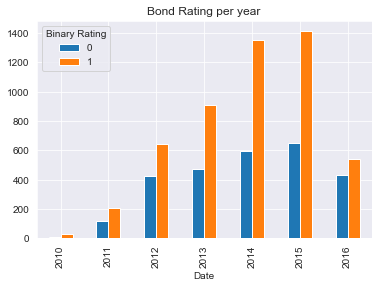

In [78]:
pd.crosstab(corp_credit_rating.Date, corp_credit_rating["Binary Rating"]).plot(kind="bar")
plt.title("Bond Rating per year")

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Number of investable corporate bond ratings per rating agency')

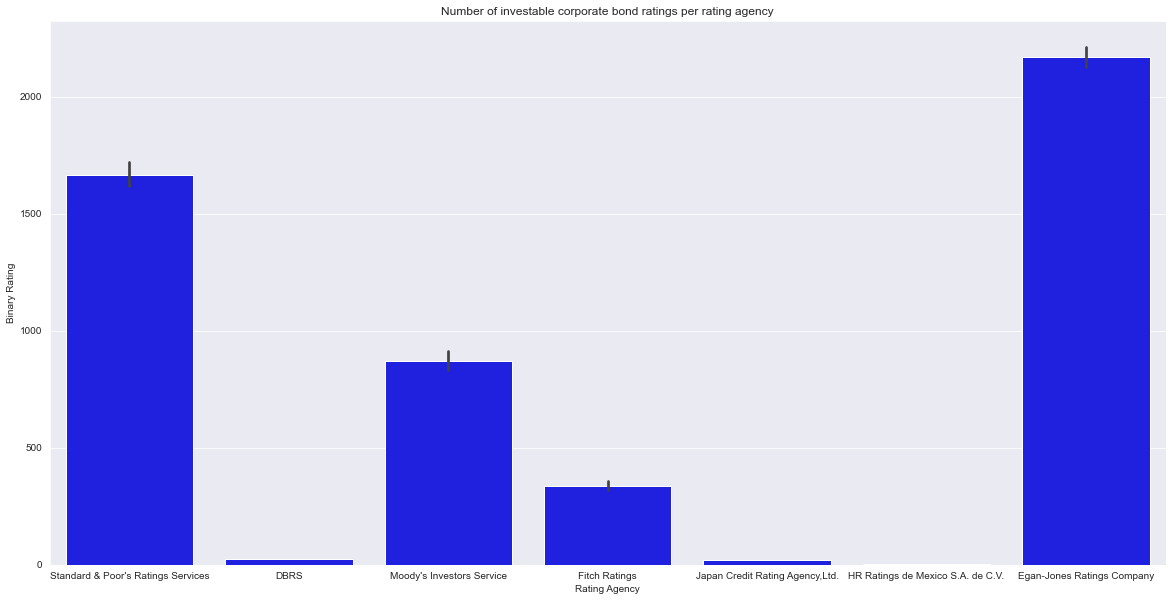

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x = "Rating Agency",
            y = "Binary Rating",
            data = corp_credit_rating,
            estimator=sum,
            color = "blue")
plt.title("Number of investable corporate bond ratings per rating agency")


Text(0.5, 1.0, 'Number of investable corporate bond ratings per Sector')

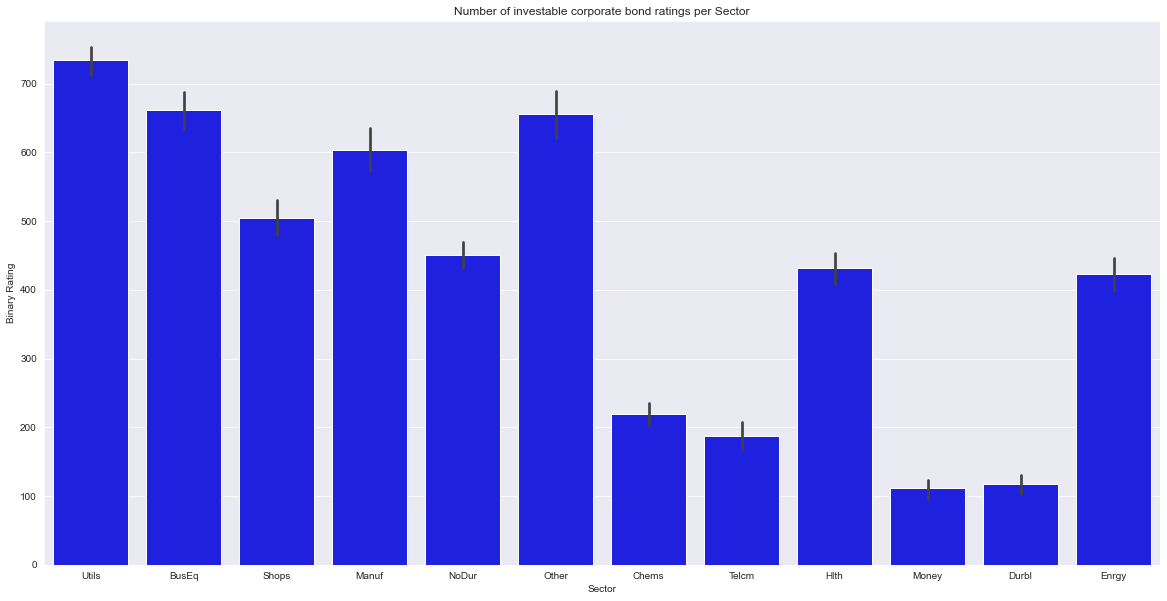

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(x = "Sector",
            y = "Binary Rating",
            data = corp_credit_rating,
            estimator=sum,
            color = "blue")
plt.title("Number of investable corporate bond ratings per Sector")

In [ ]:
Ticker_group = corp_credit_rating.groupby(["Ticker", "Corporation"])
Ticker_group.first()

ticker_rating = Ticker_group["Binary Rating"].count()
ticker_rating

In [83]:
# Max number of investable ratings
ticker_rating.max()

23

In [84]:
# Lowest number of investable ratings
ticker_rating.min()

1

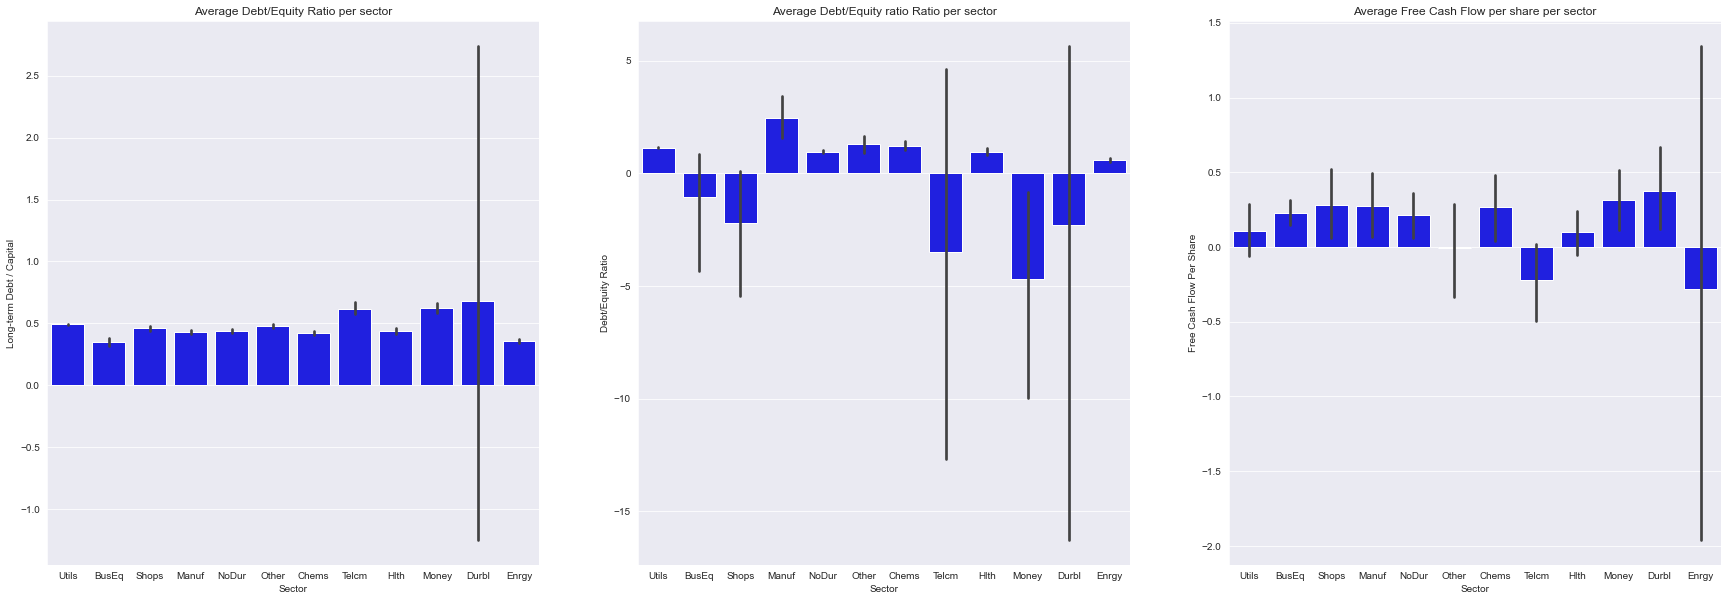

In [85]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
fig.suptitle("")

sns.barplot(ax = axes[0],
            x = "Sector",
            y = "Long-term Debt / Capital",
            data = corp_credit_rating,
            color="blue")
axes[0].set_title("Average Debt/Equity Ratio per sector")

sns.barplot(ax = axes[1],
            x = "Sector",
            y = "Debt/Equity Ratio",
            data = corp_credit_rating,
            color="blue")
axes[1].set_title("Average Debt/Equity ratio Ratio per sector")

sns.barplot(ax = axes[2],
            x = "Sector",
            y = "Free Cash Flow Per Share",
            data = corp_credit_rating,
            color="blue")
axes[2].set_title("Average Free Cash Flow per share per sector")    

sns.set_style("darkgrid")
plt.show()


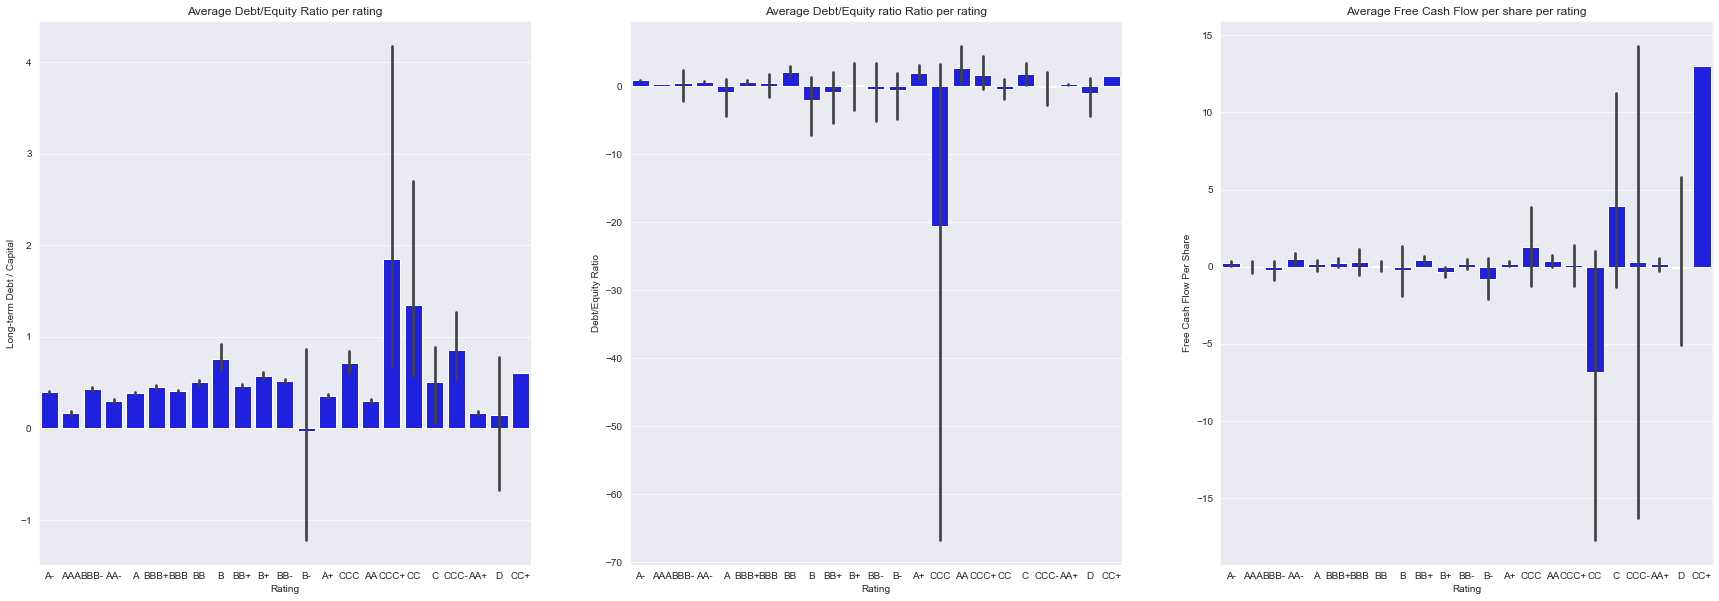

In [86]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
fig.suptitle("")

sns.barplot(ax = axes[0],
            x = "Rating",
            y = "Long-term Debt / Capital",
            data = corp_credit_rating,
            color="blue")
axes[0].set_title("Average Debt/Equity Ratio per rating")

sns.barplot(ax = axes[1],
            x = "Rating",
            y = "Debt/Equity Ratio",
            data = corp_credit_rating,
            color="blue")
axes[1].set_title("Average Debt/Equity ratio Ratio per rating")

sns.barplot(ax = axes[2],
            x = "Rating",
            y = "Free Cash Flow Per Share",
            data = corp_credit_rating,
            color="blue")
axes[2].set_title("Average Free Cash Flow per share per rating")    

sns.set_style("darkgrid")
plt.show()

<AxesSubplot:>

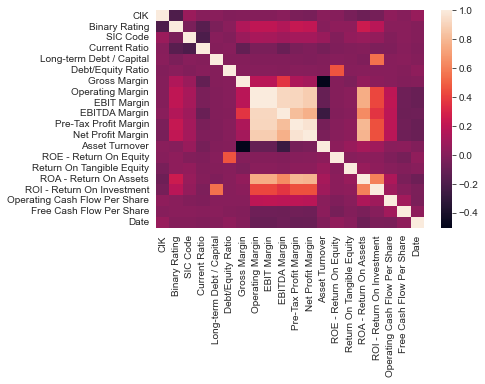

In [87]:
pearsoncorr = corp_credit_rating.corr(method="pearson")
sns.heatmap(pearsoncorr)

In [88]:
sample1 = corp_credit_rating[corp_credit_rating["Date"]==2011]
sample1.Date.unique()

array([2011], dtype=int64)

In [89]:
sample1.describe().round(2)

,CIK,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Date
count,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.00,325.0
mean,666857.23,0.64,3833.97,1.97,1.01,-8.58,43.15,14.61,14.65,23.08,11.22,8.25,0.79,-42.76,42.81,5.43,9.84,1.85,0.47,2011.0
std,473769.08,0.48,1717.86,2.13,9.52,113.23,24.47,13.23,13.22,16.73,13.31,11.18,0.63,702.83,516.20,5.76,43.46,16.07,6.39,0.0
min,1800.00,0.00,1000.00,0.33,-7.44,-1473.10,1.38,-45.40,-45.40,-32.21,-44.62,-52.53,0.15,-11258.21,-583.00,-16.68,-445.83,-16.36,-25.69,2011.0
25%,79879.00,0.00,2834.00,1.14,0.25,0.32,22.05,6.89,6.98,12.01,3.74,2.52,0.38,3.76,-2.65,2.23,3.23,-0.36,-0.85,2011.0
50%,825542.00,1.00,3674.00,1.52,0.39,0.66,40.01,12.29,12.40,18.86,9.91,7.12,0.65,11.24,10.99,4.91,7.38,0.42,0.23,2011.0
75%,1043509.00,1.00,4911.00,2.29,0.52,1.12,62.51,21.20,21.20,34.02,16.10,12.42,0.98,19.50,28.32,7.54,12.78,2.30,1.36,2011.0
max,1701605.00,1.00,9997.00,34.08,171.50,34.94,100.00,50.68,50.68,82.11,55.75,47.49,5.39,180.00,9025.00,27.07,466.67,282.19,91.37,2011.0


In [ ]:
pip install imblearn

In [ ]:
pip install imbalanced-learn

In [92]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 

In [93]:
# Model for 2016
data = corp_credit_rating[corp_credit_rating["Date"]==2016]
data.Date.unique()

array([2016], dtype=int64)

In [94]:
data.describe().round(2)

,CIK,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Date
count,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.0
mean,864513.05,0.56,3992.00,1.91,0.50,-1.26,42.66,0.67,0.79,12.38,-4.38,-4.55,0.79,27.15,8.53,1.14,2.84,-0.27,0.44,2016.0
std,525606.21,0.50,1946.17,1.81,0.31,52.23,24.15,55.42,55.48,46.17,60.57,51.16,0.63,313.67,199.53,15.68,20.84,7.03,6.62,0.0
min,1800.00,0.00,1000.00,0.17,-0.20,-776.59,-87.68,-461.79,-461.79,-360.82,-476.01,-414.82,0.07,-4418.89,-1681.24,-121.87,-142.79,-51.55,-47.24,2016.0
25%,319687.00,0.00,2810.00,1.02,0.32,0.47,24.86,3.36,3.36,9.23,0.52,-0.08,0.36,-0.10,-21.79,0.24,0.51,-0.72,-0.72,2016.0
50%,928022.00,1.00,3674.00,1.46,0.46,0.83,39.76,10.18,10.18,17.18,7.32,5.34,0.61,10.45,3.76,3.89,5.77,0.15,0.24,2016.0
75%,1264089.00,1.00,4931.00,2.15,0.61,1.45,58.27,17.46,17.46,29.43,15.30,11.22,0.96,20.61,24.87,7.26,10.85,1.06,1.23,2016.0
max,1748790.00,1.00,9997.00,17.98,3.04,194.38,100.00,66.75,66.75,83.02,131.39,70.66,4.86,2665.00,1531.82,34.79,75.48,67.41,92.62,2016.0


In [95]:
# Check if data is balanced
balance = data["Binary Rating"].value_counts()
print(balance)

1    543
0    432
Name: Binary Rating, dtype: int64


In [96]:
os = SMOTE(random_state=0)
# All variables possible for model
X = data.iloc[:,9:25]
# Dependent variable
y = data["Binary Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [97]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Binary Rating'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non investable bonds in oversampled data",len(os_data_y[os_data_y['Binary Rating']==0]))
print("Number of investable bonds",len(os_data_y[os_data_y['Binary Rating']==1]))
print("Proportion of non investable bonds data in oversampled data is ",len(os_data_y[os_data_y['Binary Rating']==0])/len(os_data_X))
print("Proportion of investable bonds data in oversampled data is ",len(os_data_y[os_data_y['Binary Rating']==1])/len(os_data_X))

length of oversampled data is  778
Number of non investable bonds in oversampled data 389
Number of investable bonds 389
Proportion of non investable bonds data in oversampled data is  0.5
Proportion of investable bonds data in oversampled data is  0.5


In [98]:
# Check if data is balanced
balance = os_data_y.value_counts()
print(balance)

Binary Rating
0                389
1                389
dtype: int64


In [ ]:
print(os_data_X)

In [ ]:
print(os_data_y)

In [ ]:
# Chossing variables
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
X = os_data_X[['Current Ratio', 'Long-term Debt / Capital','Operating Margin', 'EBIT Margin','Net Profit Margin', 'Asset Turnover','ROI - Return On Investment','Free Cash Flow Per Share']]
y = os_data_y
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [104]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 85  32]
 [ 17 100]]


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       117
           1       0.76      0.85      0.80       117

    accuracy                           0.79       234
   macro avg       0.80      0.79      0.79       234
weighted avg       0.80      0.79      0.79       234



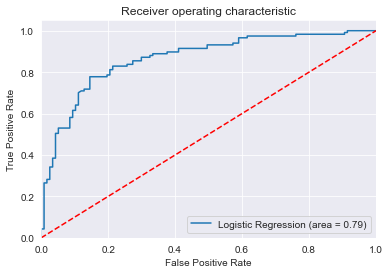

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()